# Python For Finance - Algotrithmic Trading

By Dan Greenhill
<br>
<br>
Tutorial provided by DataCamp: <br>
[(Tutorial) Python For Finance: Algorithmic Trading](https://www.datacamp.com/community/tutorials/finance-python-trading) <br>
<br>
Covering: <br>
- Getting Started With Python for finance 
    - Stocks and Trading <br>
    - Time Series Data <br>
    - Setting Up The Workspace <br>
        - Importing Financial Data into Python <br>
        - Working With and Visualising Time Series Data <br>
- Common Financial Analysis <br>
    - Returns <br>
    - Moving Windows <br>
    - Volatility Calculation <br>
    - Ordinary Least Squares Regression (OLS) Analysis <br>
- Building A Trading Strategy With Python <br>
- Backtesting A Strategy <br>
    - Implementation of a Simple Backtester <br>
    - Backtesting With Zipline And Quantopian <br>
- Improving A Trading Strategy <br>
- Evaluating A Trading Strategy <br>
    - Sharpe Ratio <br>
    - Maximum Drawdown <br>
    - Compound Annual Growth Rate <br>

## Importing Data

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import datetime
import quandl 
import matplotlib

Import up-to-date financial data using the Pandas datareader. <br>
Yahoo Finance was used in this case as this is most widely used.

In [2]:
# Retrieve 4 years of daily share price data ($AAPL)
import pandas_datareader as pdr
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2016, 4, 14), 
                          end=datetime.datetime(2020, 4, 14))

# Display most recent data
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993
2020-04-08,267.369995,261.230011,262.739990,266.070007,42223800.0,266.070007
2020-04-09,270.070007,264.700012,268.700012,267.989990,40529100.0,267.989990
2020-04-13,273.700012,265.829987,268.309998,273.250000,32755700.0,273.250000
2020-04-14,288.250000,278.049988,280.000000,287.049988,48748700.0,287.049988


## Working With Time Series

### Plotting Time Series

Plotting the daily closing share price as a time series plot using `matplotlib`

In [3]:
# Import matplotlib pyplot module as `plt`
import matplotlib.pyplot as plt

# Plot $AAPL closing values
aapl['Close'].plot(grid='true')

# Print the plot
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

## Common Financial Analysis

### Returns

Calculating a daily percentage change that does not take into account dividends or other factors. It represents the percentage change of the value of a stock over a day of trading, using the Pandas function `pct_change()`

In [4]:
# Assign 'Adj Close' column to 'daily_close' variable
daily_close = aapl[['Adj Close']]

# Calculate the daily percentage change
daily_pct_c = daily_close.pct_change()

# Replace NA Values with 0
daily_pct_c.fillna(0, inplace=True)

# Print the daily returns to inspect
print(daily_pct_c)

            Adj Close
Date                 
2016-04-14   0.000000
2016-04-15  -0.020071
2016-04-18  -0.021575
2016-04-19  -0.005303
2016-04-20   0.002058
...               ...
2020-04-07  -0.011582
2020-04-08   0.025595
2020-04-09   0.007216
2020-04-13   0.019628
2020-04-14   0.050503

[1007 rows x 1 columns]


Calculate the log of the returns to provide a better insight into the growth of the returns over time

In [5]:
# Calculate daily log returns 
daily_log_returns = np.log(daily_close.pct_change()+1)

# Replace NA Values with 0
daily_log_returns.fillna(0, inplace=True)

# Print the log daily returns
print(daily_log_returns)

            Adj Close
Date                 
2016-04-14   0.000000
2016-04-15  -0.020275
2016-04-18  -0.021811
2016-04-19  -0.005317
2016-04-20   0.002056
...               ...
2020-04-07  -0.011650
2020-04-08   0.025273
2020-04-09   0.007190
2020-04-13   0.019437
2020-04-14   0.049269

[1007 rows x 1 columns]


Use `resample()` function to show monthly and quarterly returns

In [6]:
# Resample aapl to business months and take the last observation as the value
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample aapl to business quarters, use the mean for the value each quarter
quarter = aapl.resample('4M').mean()

# Calculate the quartlerly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-31,-0.048970,-0.043708,-0.048747,-0.044337,-0.315659,-0.037397
2016-12-31,0.132328,0.130420,0.131534,0.131901,0.020112,0.139475
2017-04-30,0.187484,0.194277,0.190375,0.191286,-0.279860,0.198164
2017-08-31,0.134903,0.129311,0.133584,0.131577,0.087426,0.138121
2017-12-31,0.083752,0.085154,0.084586,0.084472,0.002854,0.089982
2018-04-30,0.045926,0.038891,0.041273,0.040875,0.296623,0.045871
2018-08-31,0.129468,0.136446,0.132707,0.135197,-0.287698,0.141535
2018-12-31,0.037492,0.024439,0.033765,0.029014,0.574930,0.033560


The distribution of `daily_pct_c` can also be plotted using `matplotlib`

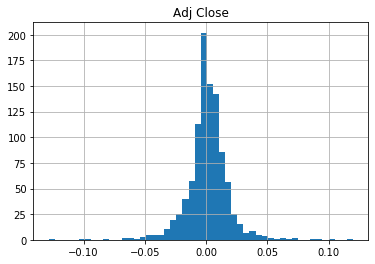

         Adj Close
count  1007.000000
mean      0.001165
std       0.018230
min      -0.128647
25%      -0.005662
50%       0.000897
75%       0.009000
max       0.119808


In [7]:
# Plot the distribution of daily_pct_c
daily_pct_c.hist(bins=50)

# Display the plot
plt.show()

# Dispay summary statistics
print(daily_pct_c.describe())

We can see that the distribution is relatively symmetrical and normally distributed, centered around the mean.

The cumulative daily rate of return can be used to determine the value of an investment at regular intervals. 

In [8]:
# Calculate the cumulative daily returns
cum_daily_return = (1+daily_pct_c).cumprod()

# Print the cumulative daily return
print(cum_daily_return)

            Adj Close
Date                 
2016-04-14   1.000000
2016-04-15   0.979929
2016-04-18   0.958787
2016-04-19   0.953702
2016-04-20   0.955665
...               ...
2020-04-07   2.469036
2020-04-08   2.532230
2020-04-09   2.550502
2020-04-13   2.600563
2020-04-14   2.731899

[1007 rows x 1 columns]


We can plot the cumulative daily returns using `matplotlib` 

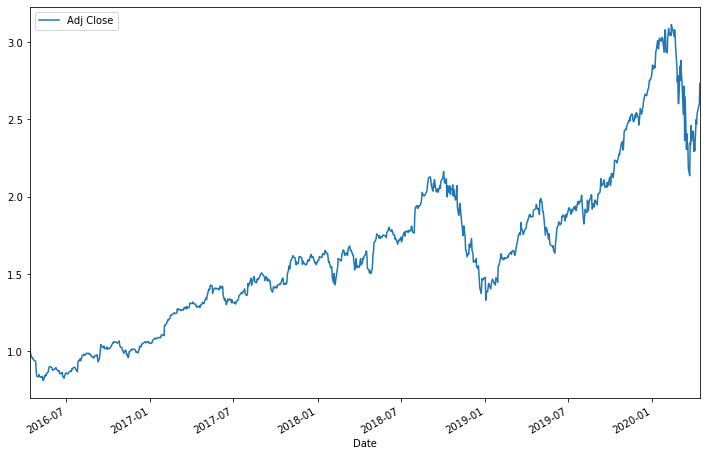

In [9]:
# Plot the cumulative daily return
cum_daily_return.plot(figsize=(12, 8))

Again, we can use `resample()` to see the monthly returns

In [10]:
# Resample the cumulative daily returns to show the cumulative monthly returns
cum_monthly_return = cum_daily_return.resample('M').mean()

# Print the cumulatve monthly returns
print(cum_monthly_return)

            Adj Close
Date                 
2016-04-30   0.929929
2016-05-31   0.851659
2016-06-30   0.867177
2016-07-31   0.884537
2016-08-31   0.970853
2016-09-30   1.000324
2016-10-31   1.044088
2016-11-30   0.998593
2016-12-31   1.037010
2017-01-31   1.084484
2017-02-28   1.216413
2017-03-31   1.280915
2017-04-30   1.301584
2017-05-31   1.390349
2017-06-30   1.352182
2017-07-31   1.356464
2017-08-31   1.458530
2017-09-30   1.447273
2017-10-31   1.449190
2017-11-30   1.586947
2017-12-31   1.584104
2018-01-31   1.603583
2018-02-28   1.549309
2018-03-31   1.614664
2018-04-30   1.571526
2018-05-31   1.721087
2018-06-30   1.752100
2018-07-31   1.767798
2018-08-31   1.986664
2018-09-30   2.070072
2018-10-31   2.058624
2018-11-30   1.787215
2018-12-31   1.536560
2019-01-31   1.442082
2019-02-28   1.611435
2019-03-31   1.721898
2019-04-30   1.883688
2019-05-31   1.801403
2019-06-30   1.819769
2019-07-31   1.935267
2019-08-31   1.938208
2019-09-30   2.063585
2019-10-31   2.227270
2019-11-30

This data can also be compared with data from multiple stocks - In this case, we will compare Apple (AAPL), Microsoft (MSFT), IBM (IBM) and Google (GOOG).
<br> <br>
We will do this by creating a function that takes the stock's ticker (`ticker`), a start date (`startdate`) and an end date (`enddate`). The `data()` function then uses the `ticker` to return data from the `startdate` and to the `enddate`. This data is then used in the `get()` function to return a dataframe with our stock price data.

In [11]:
from pandas_datareader import data as pdr

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2014, 4, 20), datetime.datetime(2020, 4, 20))
all_data.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2014-04-21  76.019997  74.851425  75.048569  75.881432   45637200.0   
       2014-04-22  75.975716  75.214287  75.472855  75.957146   50640800.0   
       2014-04-23  75.875717  74.921425  75.580002  74.964287   98735000.0   
       2014-04-24  81.428574  80.104286  81.172859  81.110001  189977900.0   
       2014-04-25  81.712860  80.565712  80.647141  81.705711   97568800.0   

                   Adj Close  
Ticker Date                   
AAPL   2014-04-21  68.530251  
       2014-04-22  68.598633  
       2014-04-23  67.701942  
       2014-04-24  73.252281  
       2014-04-25  73.790291

We can use this data to, once again, calculate and compare the distribution of the daily percentage change of each stock. 

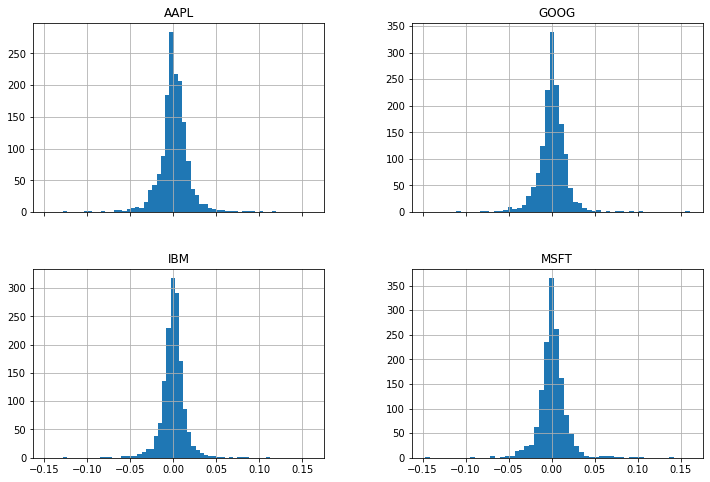

In [12]:
# Isolate the Adj Close column to give us daily closing prices
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change of all stocks
daily_pct_change = daily_close_px.pct_change()

# Plot the distribution for each ticker
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the plot
plt.show()

We can also use the `pandas` library to create a scatter plot matrix to compare the distribution of each stock's daily closing price with the others by using the `scattermatrix()` function.

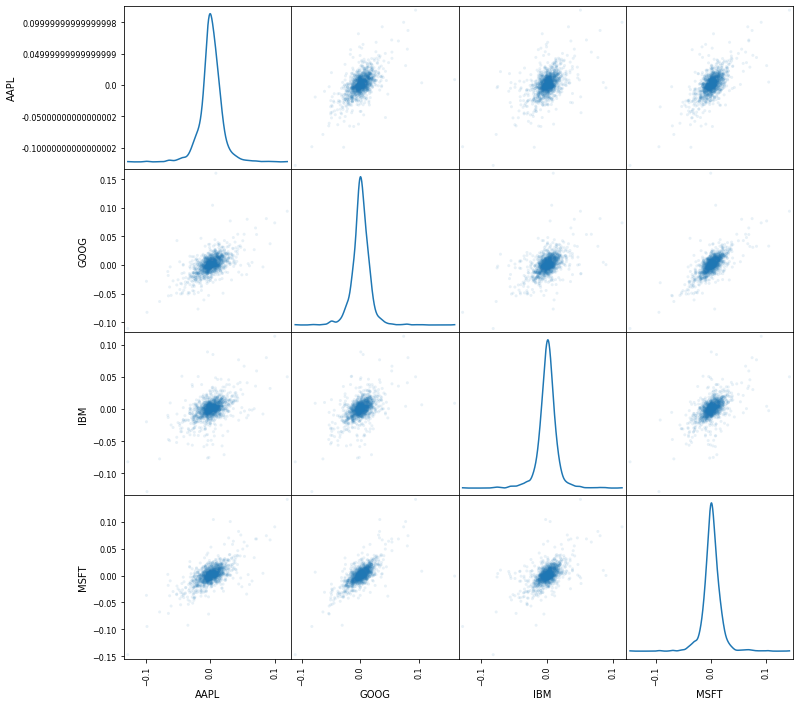

In [13]:
# Use the daily_pct_change data to plot a scatter plot matrix 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Moving Windows

<br>
Moving windows are used to compute on and analyse data represented by a certain period of time.  This window can then be moved across the data by a set interval, allowing the data to be analysed and the statistics calculated continually, as long as the window falls within the dates of the time series.
 

Commonly, a moving average is used to analyse the trend of data. This can be done by combining the `rolling()` and `mean()`  functions.

In [14]:
# Isolate the Adj Close column
adj_close_px = aapl['Adj Close']

# Calculate the 40-day moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Print the data
moving_avg[-10:]

Date
2020-03-31    284.424098
2020-04-01    282.494472
2020-04-02    280.600498
2020-04-03    278.524748
2020-04-06    277.085748
2020-04-07    275.532748
2020-04-08    274.194249
2020-04-09    272.713998
2020-04-13    271.423499
2020-04-14    270.475998
Name: Adj Close, dtype: float64

We can also plot this data as an indicator on a chart in order to get a better understanding of the moving averages. We will use a combination of the short-term 42-day and long-term 252-day moving average as in the tutorial.

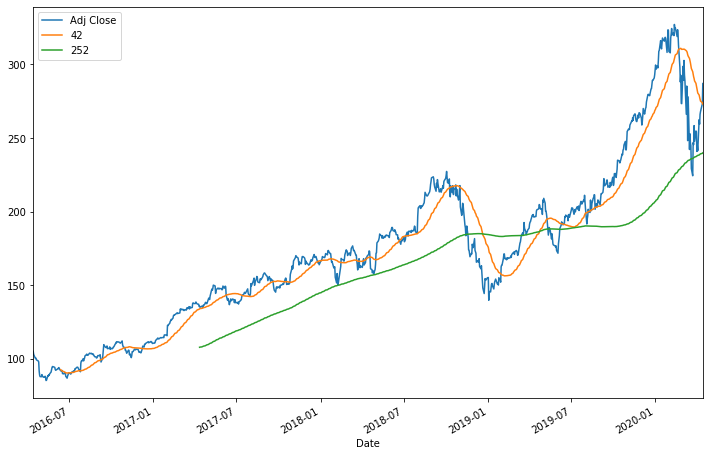

In [15]:
# Calculate the short 42-Day moving average
aapl['42'] = adj_close_px.rolling(window=42).mean()

# Calculate the long 252-day moving average
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the close price and moving averages
aapl[['Adj Close', '42', '252']].plot(figsize=(12,8))



### Volatility Calculations

A stock's volatility is a measure of the change of variance of the stock over a specific time. <br>
The volatility is calculated by taking a rolling window standard deviation on the percentage change in a stock.
<br> <br>
We can measure this by taking rolling stardard deviations (`std()`) of the daily percentage change.

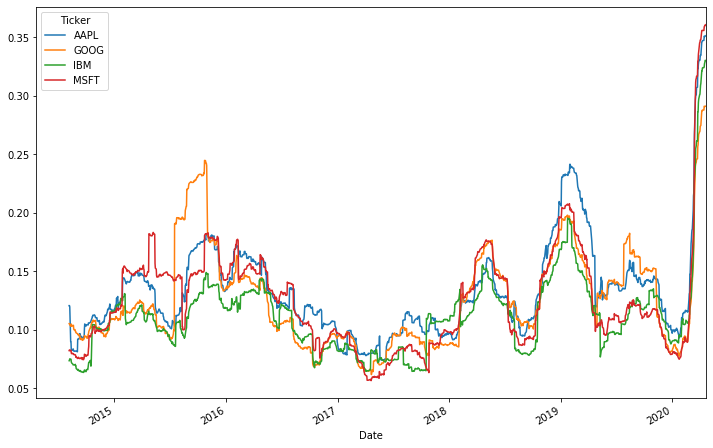

In [16]:
# Define the minumum of periods 
min_periods = 75 

# Calculate the stock's volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(12,8))

### Ordinary Least Squares Regression
<br>
<br>
We can use the `statsmodels` library in order to perform statistical analysis on our data. We can conduct statistical tests and perform deeper statistcal analysis, such as Ordinary Least Squares Regression (OLS).

In [17]:
import statsmodels.api as sm
from pandas import tseries

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns of these 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Concatenate a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1167.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          7.15e-190
Time:                        14:10:52   Log-Likelihood:                 4471.2
No. Observations:                1510   AIC:                            -8938.
Df Residuals:                    1508   BIC:                            -8928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.495      0.1

C:\Users\djggr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Using these results, we can plot the Ordinary Least Sqaures Regression using `matplotlib`

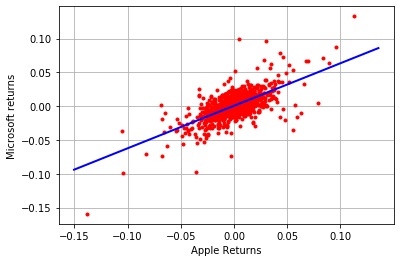

In [18]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add our axis
ax = plt.axis()

# Initialise 'x'
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot our regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

We can also plot a rolling window of the correlating returns of AAPL and MSFT in order to cross check our results.

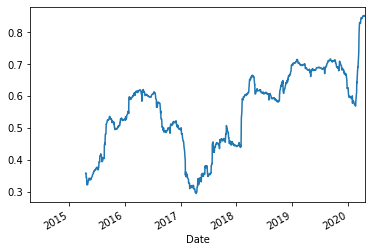

In [19]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Plot the rolling correlation plot
return_data['AAPL'].rolling(window=252).corr(return_data['MSFT']).plot()

# Show the plot
plt.show()

## Building A Trading Strategy with Python

In this section, we will formulate a trading plan with signals overlaid onto a chart. The trading strategy will consist of a Moving Average Crossover strategy - the bread and butter for many momentum traders.
<br>
The Moving Average Crossover stragetgy is used when the short term Simple Moving Average (SMA) crosses above the long term MA, triggering a buy signal. The opposite also applies - when the short term SMA crosses below the long term MA, a short signal is triggered. 
<br>
We will create and plot this trading strategy below. The windows of the SMA can be customised to an investor's preference.
<br>
In this case, we will use a 40-Day SMA for the short term and 100-Day SMA for the long term moving averages, as per the tutorial.

In [20]:
# Define windows for short term and long term simple moving average
short_window = 40
long_window = 100

# Create a 'signals' dataframe, indexing AAPL data and adding a 'signals' column, defaulting to 0.0
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create a short term SMA over the predefined short term window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create a long term SMA over the predefined long term window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals for when the short term SMA crosses the long term SMA
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:],
                                            1.0, 0.0)

# Generate trading orders using the difference of the 'signals' column
signals['positions'] = signals['signal'].diff()

# Print Signals dataframe to inspect
#print(signals)

We can then plot these on a chart in order to visually inspect our trading signals

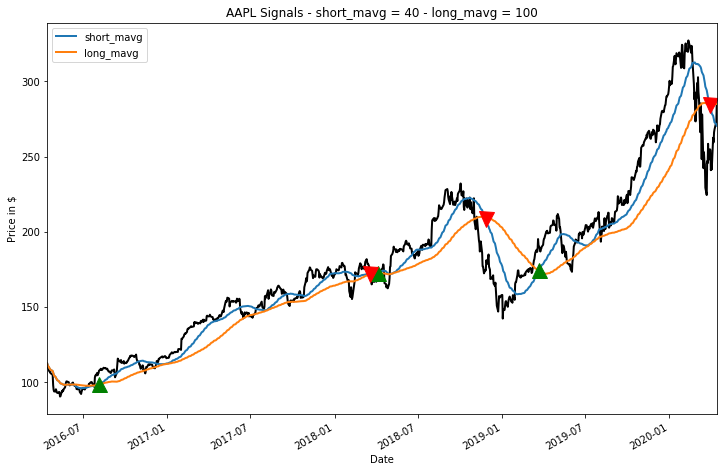

In [26]:
# Initialise the plot figure
fig = plt.figure(figsize=(12,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot AAPL closing price
aapl['Close'].plot(ax=ax1, color='black', lw=2.)

# Plot the long term and short term SMA
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=15, color='g')
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=15, color='r')

# Show the plot
plt.title('AAPL Signals - short_mavg = ' +str(short_window)+ ' - long_mavg = ' +str(long_window))
plt.show()

## Backtesting A Strategy

### Implementing A Simple Backtester With Pandas


A simple backtester usually consists of a strategy, a data handler, a portfolio and an execution handler. We have already implemented a strategy above, and our data handler is, in this case, `pandas datareader`. 
<br>
Below, we will create the portfolio which can generate orders and manage the profit and loss.

In [28]:
# Define our portfolio's initial capital
initial_capital = float(100000.0)

# Create a new dataframe for our positions, using our `signals` dataframe
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Start by buying 100 shares and creating a new column for them
    # When the signal is 0 (sell), the position will be 0 shares owned
positions['AAPL'] = 100*signals['signal']

# Initialise the portfolio with the value of shares owned
    # Shares owned * Closing price
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in the number of shares owned
pos_diff = positions.diff()

# Add a 'holdings' column to the portfolio dataframe
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).round(2)

# Add a 'cash' column, indicating the capital that we have left to spend (i.e. initial capital - holdings)
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0).sum(axis=1)).cumsum().round(2)

# Add a 'total' column, containing the value of our portfolio (sum of cash + value of current holdings)
portfolio['total'] = portfolio['cash'] + portfolio['holdings']


# Add a 'returns' column, to store our return on investment percentage
portfolio['returns'] = portfolio['total'].pct_change()

# Show the latest values of the portfolio
portfolio.tail()

,AAPL,holdings,cash,total,returns
Date,,,,,
2020-04-07,0.0,0.0,114178.54,114178.54,0.0
2020-04-08,0.0,0.0,114178.54,114178.54,0.0
2020-04-09,0.0,0.0,114178.54,114178.54,0.0
2020-04-13,0.0,0.0,114178.54,114178.54,0.0
2020-04-14,0.0,0.0,114178.54,114178.54,0.0


We can also plot this visually, to give a better representation of our portfolio's value over time

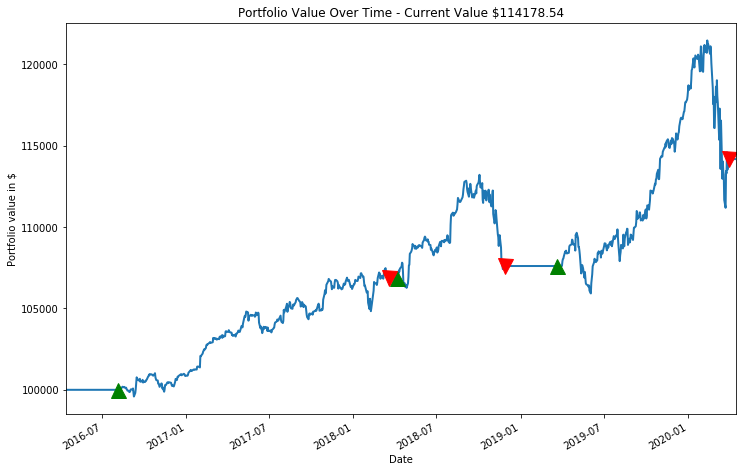

In [30]:
import matplotlib.pyplot as plt

# Define our Figure
fig = plt.figure(figsize=(12,8))

# Define our Y-axis label
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve of our portfolio in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the buy signals against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions == 1.0],
         '^', markersize=15, color='g')

# Plot the sell signals against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, portfolio.total[signals.positions == -1.0],
         'v', markersize=15, color='r')

# Add current total value of portfolio into plot title 
portfolio_count = len(portfolio)
last_total = portfolio['total'].iloc[portfolio_count-1].round(2)
plt.title('Portfolio Value Over Time - Current Value $' +str(last_total))

# Show plot
plt.show()

## Evaluating A Trading Strategy

### Sharpe Ratio

We can use `pandas` to calculate metrics in order to evaulate our trading strategy. An example of this is the Sharpe Ratio, which measures an investment's rate of return relative to it's risk. Typically, a larger Sharpe Ratio indicates that the investment has favourable returns in relation to the risk undertaken investing in it. 
<br>
To calculate the Sharpe Ratio, we can use the formula:
\begin{equation*}
\frac{R_p - R_f}{\sigma_p}
\end{equation*}

In [26]:
# First, we will isolate the returns of the strategy
returns = portfolio['returns']

# Create an annualised Sharpe Ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe Ratio
print(sharpe_ratio)

0.689852717872178


### Maximum Drawdown

We can also measure the Maximum Drawdown, which will show us the largest single drop from the peak to the bottom in the value of our portfolio. 

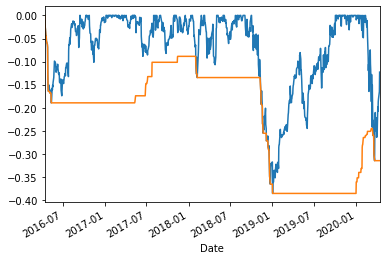

In [28]:
# Define a 252 day rolling window
window = 252

# Calculate the max drawdowns within the chosen window
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1

# Calculate the minimum daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

### Compound Annual Growth Rate

We can also calculate the Compound Annual Growth Rate (CAGR), which will show us the constant rate of return of the investment over our set time period. 
<br>
To calculate this, we can use the formula:
\begin{equation*}
(\frac{V_e}{V_s})^\frac{1}{n} - 1
\end{equation*}

In [29]:
# Calculate the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.29193709330513506
